In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
zillow = pd.read_csv("./HomeHarvest_Past90Days_20241004_183918.csv")
zillow.head()

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/rentals/details/3818-J...,9784416758,2973279857,NEOH,5075465,FOR_RENT,Available December in the HEART of Ohio City! ...,MULTI_FAMILY,3818 John Ave,3818 John Ave,...,NaN,NaN,3808391.0,O-NEOH-20191,Berkshire Hathaway HomeServices Professional R...,info@bhhspro.com,"[{'number': '2169700164', 'type': 'Office', 'p...","Cleveland Metropolitan School District, Freder...",http://ap.rdcpix.com/9dd158fcfc3afd13f2bca892f...,http://ap.rdcpix.com/9dd158fcfc3afd13f2bca892f...
1,https://www.realtor.com/rentals/details/17205-...,4511959785,2973287722,NEOH,5075529,FOR_RENT,"17205 Lipton Ave, Cleveland - Spacious 3 bed 1...",SINGLE_FAMILY,17205 Lipton Ave,17205 Lipton Ave,...,NaN,NaN,995977.0,O-NEOH-2486,RE MAX Haven Realty,ngolem@remax.net,"[{'number': '(440) 519-3100', 'type': 'Office'...","Cleveland Metropolitan School District, T2 Hon...",http://ap.rdcpix.com/808a4026af13756eb120ca8ed...,http://ap.rdcpix.com/808a4026af13756eb120ca8ed...
2,https://www.realtor.com/rentals/details/1079-E...,9481543019,2973283498,NEOH,5075502,FOR_RENT,"1079 E 171ST ST| UNIT 1, Cleveland- Spacious 2...",MULTI_FAMILY,1079 E 171st St Unit 1,1079 E 171st St,...,NaN,NaN,995977.0,O-NEOH-2486,RE MAX Haven Realty,ngolem@remax.net,"[{'number': '(440) 519-3100', 'type': 'Office'...","Lakeshore Intergenerational School, Cleveland ...",http://ap.rdcpix.com/0819981e2ce04a0b455ff6a03...,http://ap.rdcpix.com/0819981e2ce04a0b455ff6a03...
3,https://www.realtor.com/rentals/details/787-Lo...,9833605896,2973268476,AVAL,61200520,FOR_RENT,"Amazing 1 bedroom, 1 bathroom apartment in Cle...",APARTMENT,787 London Rd Apt 3,787 London Rd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland Metropolitan School District, East A...",http://ap.rdcpix.com/635d5860ce26f5ecd25ae42f6...,http://ap.rdcpix.com/635d5860ce26f5ecd25ae42f6...
4,https://www.realtor.com/rentals/details/1434-W...,9190105426,2973256778,RENU,r3773772,FOR_RENT,Welcome to this charming apartment located at ...,APARTMENT,1434 W 112th St Apt 2,1434 W 112th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lakewood City Academy, Cleveland Metropolitan ...",NaN,NaN


In [7]:
zillow.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'new_construction', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent_id', 'agent_name',
       'agent_email', 'agent_phones', 'agent_mls_set', 'agent_nrds_id',
       'broker_id', 'broker_name', 'builder_id', 'builder_name', 'office_id',
       'office_mls_set', 'office_name', 'office_email', 'office_phones',
       'nearby_schools', 'primary_photo', 'alt_photos'],
      dtype='object')

In [10]:
zillow_imp = zillow[['text', 'style', 'full_street_line', 'city', 'state', 'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'list_price', 'list_price_min', 'list_price_max', 'list_date', 'sold_price', 'last_sold_date', 'assessed_value', 'price_per_sqft', 'latitude', 'longitude', 'hoa_fee', 'parking_garage']]
zillow_imp.head()

,text,style,full_street_line,city,state,zip_code,beds,full_baths,half_baths,sqft,...,list_price_max,list_date,sold_price,last_sold_date,assessed_value,price_per_sqft,latitude,longitude,hoa_fee,parking_garage
0,Available December in the HEART of Ohio City! ...,MULTI_FAMILY,3818 John Ave,Cleveland,OH,44113,2.0,1.0,1.0,938.0,...,NaN,2024-10-04,NaN,NaN,NaN,2.0,41.484055,-81.714165,0.0,NaN
1,"17205 Lipton Ave, Cleveland - Spacious 3 bed 1...",SINGLE_FAMILY,17205 Lipton Ave,Cleveland,OH,44128,3.0,1.0,1.0,918.0,...,NaN,2024-10-04,135000.0,2023-02-22,12610.0,1.0,41.435800,-81.559193,0.0,2.0
2,"1079 E 171ST ST| UNIT 1, Cleveland- Spacious 2...",MULTI_FAMILY,1079 E 171st St Unit 1,Cleveland,OH,44119,2.0,1.0,NaN,1113.0,...,NaN,2024-10-04,NaN,NaN,NaN,1.0,41.578304,-81.560318,0.0,1.0
3,"Amazing 1 bedroom, 1 bathroom apartment in Cle...",APARTMENT,787 London Rd Apt 3,Cleveland,OH,44110,1.0,1.0,NaN,700.0,...,NaN,2024-10-04,NaN,NaN,NaN,1.0,41.559353,-81.565918,NaN,NaN
4,Welcome to this charming apartment located at ...,APARTMENT,1434 W 112th St Apt 2,Cleveland,OH,44102,2.0,1.0,NaN,900.0,...,NaN,2024-10-04,NaN,NaN,NaN,1.0,41.481632,-81.765244,NaN,NaN


In [32]:
zillow_apt = zillow.loc[zillow['style']=="APARTMENT"]
(zillow_apt)

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
3,https://www.realtor.com/rentals/details/787-Lo...,9833605896,2973268476,AVAL,61200520,FOR_RENT,"Amazing 1 bedroom, 1 bathroom apartment in Cle...",APARTMENT,787 London Rd Apt 3,787 London Rd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland Metropolitan School District, East A...",http://ap.rdcpix.com/635d5860ce26f5ecd25ae42f6...,http://ap.rdcpix.com/635d5860ce26f5ecd25ae42f6...
4,https://www.realtor.com/rentals/details/1434-W...,9190105426,2973256778,RENU,r3773772,FOR_RENT,Welcome to this charming apartment located at ...,APARTMENT,1434 W 112th St Apt 2,1434 W 112th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lakewood City Academy, Cleveland Metropolitan ...",NaN,NaN
5,https://www.realtor.com/rentals/details/13415-...,9309894665,2973279303,NEOH,5075377,FOR_RENT,Beautiful Tudor Apartment complex features stu...,APARTMENT,13415 S Woodland Rd Apt 1,13415 S Woodland Rd,...,NaN,NaN,NaN,O-NEOH-20502,Century 21 Wilbur Realty,wilburrealty@aol.com,"[{'number': '3306735883', 'type': None, 'prima...","Randall Park High School, Intergenerational Sc...",http://ap.rdcpix.com/d58667559a9ca3b9332588803...,http://ap.rdcpix.com/d58667559a9ca3b9332588803...
6,https://www.realtor.com/rentals/details/2910-L...,4175242400,2973278745,NEOH,5075357,FOR_RENT,Beautiful Tudor Apartment Complex Features Stu...,APARTMENT,2910 Ludlow Rd Unit 4,2910 Ludlow Rd,...,NaN,NaN,NaN,O-NEOH-20502,Century 21 Wilbur Realty,wilburrealty@aol.com,"[{'number': '3306735883', 'type': None, 'prima...","Randall Park High School, Intergenerational Sc...",http://ap.rdcpix.com/c321055f865bb5655a22ee770...,http://ap.rdcpix.com/c321055f865bb5655a22ee770...
9,https://www.realtor.com/rentals/details/10809-...,9115409583,2973225962,NEOH,5075194,FOR_RENT,Newly renovated three bedroom apartment. Beaut...,APARTMENT,10809 Nelson Ave,10809 Nelson Ave,...,NaN,NaN,2905355.0,O-NEOH-2550,"Mcmullan Realty, Inc.",hstoudermire@gmail.com,"[{'number': '2169918100', 'type': 'Office', 'p...","Harvard Avenue Community School, Cleveland Met...",http://ap.rdcpix.com/f9182183b541bebb21c0b8528...,http://ap.rdcpix.com/f9182183b541bebb21c0b8528...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,https://www.realtor.com/rentals/details/18009-...,3871537195,2969255721,RLXB,65f0980f-99f0-11e8-b094-1866da7291d3,FOR_RENT,NaN,APARTMENT,18009 Lake Shore Blvd,18009 Lake Shore Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lakeshore Intergenerational School, Cleveland ...",NaN,NaN
388,https://www.realtor.com/rentals/details/12423-...,3946099195,2969288936,RLXB,4b0ecefe-6b22-11eb-bfc8-0a46b431b920,FOR_RENT,NaN,APARTMENT,12423 Locke Ave,12423 Locke Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland Metropolitan School District, Citize...",NaN,NaN
389,https://www.realtor.com/rentals/details/3820-R...,9008430117,2969328477,RLXB,f5b0ebb0-1f09-11ed-8887-020b2875343c,FOR_RENT,NaN,APARTMENT,3820 Riverside Ave,3820 Riverside Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland Metropolitan School District, Lincol...",NaN,NaN
390,https://www.realtor.com/rentals/details/4015-W...,4416413578,2969470373,RLXB,743e24fb-b113-11ee-84cf-06ac8e1ee633,FOR_RENT,NaN,APARTMENT,4015 Whitman Ave,4015 Whitman Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cleveland Metropolitan School District, Freder...",NaN,NaN


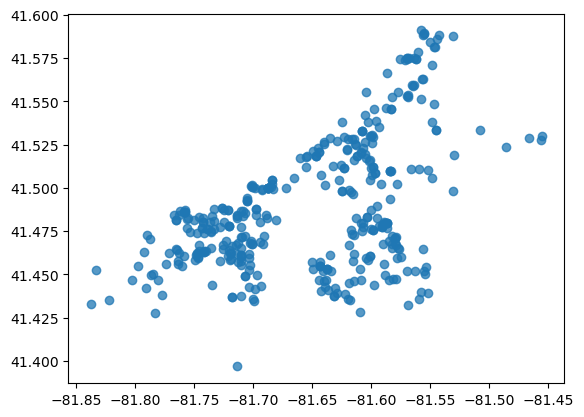

In [15]:
plt.scatter(x=zillow["longitude"], y=zillow["latitude"],alpha=0.75)